# Corey Hulse coh328 Kaggle Midterm Submission

In [3]:
#First let's import the main tools that we know we'll need right off the bat:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso
from sklearn.model_selection import cross_val_score

#from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

import csv #for loading in our data

In [4]:
#Now that we have our tools let's bring in our data so we can start taking a peak
train = pd.read_csv("C:\\Users\\User\\Documents\\GitHub\\KaggleMidterm_EE379k\\train_final.csv")
test = pd.read_csv("C:\\Users\\User\\Documents\\GitHub\\KaggleMidterm_EE379k\\test_final.csv")
print("Training Data")
print(train.head())

Training Data
   id  Y     F1     F2  F3  F4      F5    F6      F7  F8 ...   F18     F19  \
0   1  1  38733  61385   0  38  118751  1000   32020   1 ...     1  118830   
1   2  1  34248  51329   0  41  120800  1000  130630   1 ...     1  118832   
2   3  1  15830   5522   0  50  118779  1000  303218   2 ...     1  118832   
3   4  1  19417   6754   0  45  123163  2000   19024   1 ...     1  118832   
4   5  1  42122  16991   0  41  119193  1000  303218   1 ...     1  118832   

   F20  F21     F22  F23    F24  F25  F26  F27  
0    1    1  126461    1  46871  NaN  NaN  NaN  
1    1    1  130296    1  42386  NaN  NaN  NaN  
2    1    2  127063    1  23968  NaN  NaN  NaN  
3    1    1   15274    1  27555  NaN  NaN  NaN  
4    1    1  133491    1  50260  NaN  NaN  NaN  

[5 rows x 29 columns]


In [5]:
#Ok after loading in the data and taking a quick peak at the head we see we have 28 features, an ID column, and our Y category
#We see some columns right off the bat have some NaN values which doesn't look too good for the viability of those features.
#Let's see what types of data we have and some other general info
train.info()
print(train['F27'][0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 29 columns):
id     16383 non-null int64
Y      16383 non-null int64
F1     16383 non-null int64
F2     16383 non-null int64
F3     16383 non-null int64
F4     16383 non-null int64
F5     16383 non-null int64
F6     16383 non-null int64
F7     16383 non-null int64
F8     16383 non-null int64
F9     16383 non-null int64
F10    16383 non-null int64
F11    16383 non-null int64
F12    16383 non-null int64
F13    16383 non-null int64
F14    16383 non-null int64
F15    16383 non-null int64
F16    16383 non-null int64
F17    16383 non-null int64
F18    16383 non-null int64
F19    16383 non-null int64
F20    16383 non-null int64
F21    16383 non-null int64
F22    16383 non-null int64
F23    16383 non-null int64
F24    16383 non-null int64
F25    0 non-null float64
F26    0 non-null float64
F27    0 non-null float64
dtypes: float64(3), int64(26)
memory usage: 3.6 MB
nan


In [6]:
#Great! We see all of our features, except for the last three columns, are 64 bit integers with no null values!
#That however doesn't mean we don't have some noise or outliers in those columns though.
#Let's first drop off those last three columns and then check the range of values those features take on

#Dropping the last three columns:
trainCopy = train.drop(['F25', 'F26', 'F27'], 1)
#We made a copy of train just so we can preserve the original data set while we transform trainCopy

In [7]:
#Checking feature ranges:
train.describe()

,id,Y,F1,F2,F3,F4,F5,F6,F7,F8,...,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,16383.000000,16383.000000,...,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,0.0,0.0,0.0
mean,8192.000000,0.941464,44312.117256,26032.070927,0.048953,40.002991,121039.419459,6.272233e+03,201731.398767,1.043216,...,1.047183,118208.827077,1.043460,1.043277,127587.576634,1.042361,52450.117256,NaN,NaN,NaN
std,4729.509065,0.234762,34815.325971,35742.773305,0.281347,4.998992,5802.987367,1.124685e+05,100732.735724,0.249209,...,0.285203,11021.402921,0.250144,0.268421,19031.948437,0.247142,34815.325971,NaN,NaN,NaN
min,1.000000,0.000000,999.000000,43.000000,0.000000,21.000000,118751.000000,1.000000e+03,15429.000000,1.000000,...,1.000000,5163.000000,1.000000,1.000000,13223.000000,1.000000,9137.000000,NaN,NaN,NaN
25%,4096.500000,1.000000,21896.000000,4603.000000,0.000000,37.000000,119325.000000,1.000000e+03,130752.000000,1.000000,...,1.000000,118832.000000,1.000000,1.000000,126972.000000,1.000000,30034.000000,NaN,NaN,NaN
50%,8192.000000,1.000000,36806.000000,13819.000000,0.000000,40.000000,119868.000000,1.000000e+03,143236.000000,1.000000,...,1.000000,119453.000000,1.000000,1.000000,127528.000000,1.000000,44944.000000,NaN,NaN,NaN
75%,12287.500000,1.000000,75414.000000,41799.500000,0.000000,43.000000,120739.000000,2.000000e+03,303218.000000,1.000000,...,1.000000,119703.000000,1.000000,1.000000,129100.000000,1.000000,83552.000000,NaN,NaN,NaN
max,16383.000000,1.000000,314150.000000,311733.000000,7.000000,59.000000,269481.000000,1.108900e+07,333172.000000,9.000000,...,13.000000,312049.000000,12.000000,8.000000,295412.000000,8.000000,322288.000000,NaN,NaN,NaN


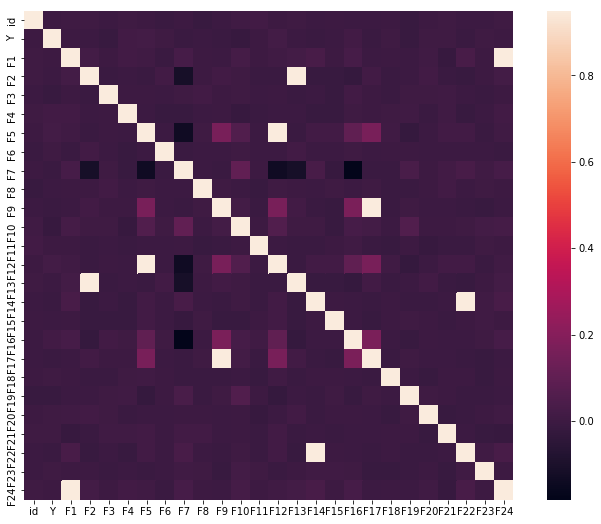

In [8]:
#Here we notice some interesting things about our data:
#1. The scales of our data are wildely different, F6 has a mean of 6.27e^3 but F8 has a mean of 1, we will have to scale these features to help this
#2. Some of our data has very little variation, seems like these aren't some of our principal components(F3, F8, F4, F15, F18, F20, F21, F23)
#3. Our top three principal components: F6, F7, and F16
#4. Our labels are categorical so our principal components may not be the best descriptors for us, we might want to run LDA 
#5. Since none of our data is labeled, it does not immediately seem like we can create/combine new features out of exisiting ones. We'll have to look at a correlation matrix
#Since we know there are no null values we have to worry about in our data, lets first look at the correlation between features:

corrmat = trainCopy.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.95, square=True);

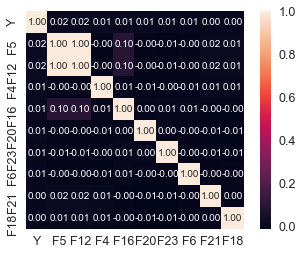

In [9]:
#So it seems like a good bit of the variables are not correlated with Y, but some seem very correlated with each other so we might
#be able to combine some pairs of them, then eliminate our least correlated variables, and *boom*, we'll have ourselves a nice feature set
#First let's try and zoom in on the most correlated variables before we do some of our combining and then we'll come back after just
#to see how thinning out similarly correlated columns helps us or change things

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Y')['Y'].index
cm = np.corrcoef(trainCopy[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#Bingo, looks like F12 is our highest correlated variable. Nice. Looks like F16 could be a secondary feature to play around with too.

#Let's take a closer look at those correlated pairs of features:
#(F1 & F24), (F2 & F13), (F5 & F12), (F9 & F17), (F14 & F22)
#Let's look at each pair in particular:

#For (F1 & F24) we see that F24 == F1 + 8138
#For (F2 & F13) we see that F13 == F2 + 357
#For (F5 and F12) we see that F12 == F5 + 1442. 
#For (F9 and F17) we see that F17 == F9 + 2880
#For (F14 and F22) we see that F22 == F14 + 8478

#This means we can drop F24, F13, F12, F17, and F22 from the training data entirely since it already exists in those other columns!
trainCopy = trainCopy.drop(['F24', 'F13', 'F12', 'F17', 'F22'])

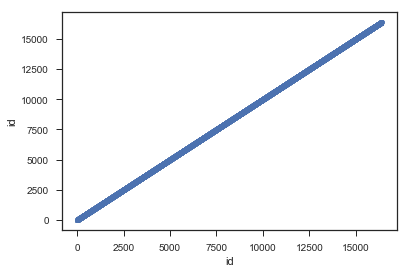

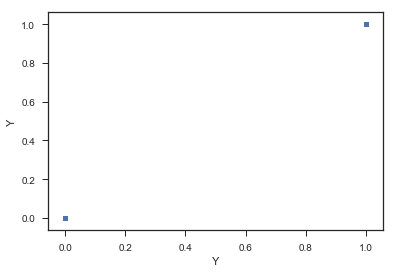

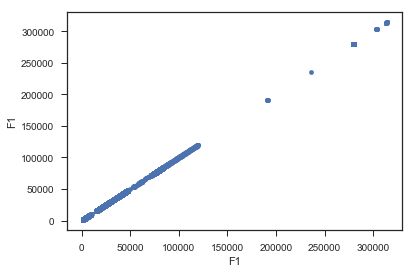

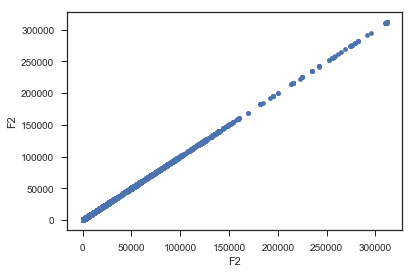

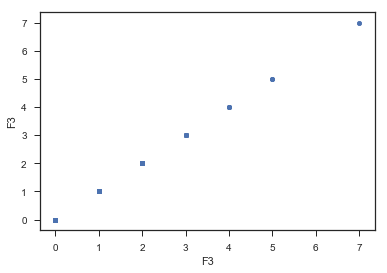

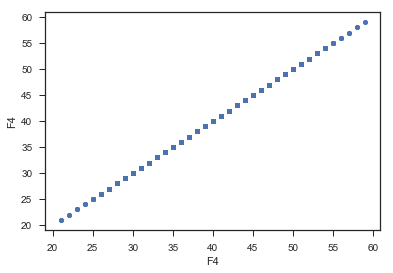

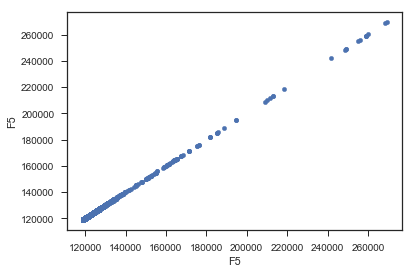

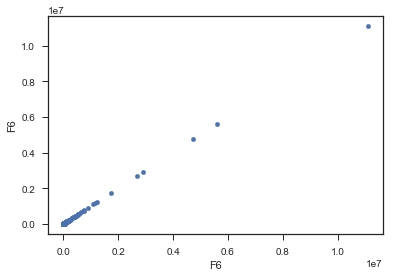

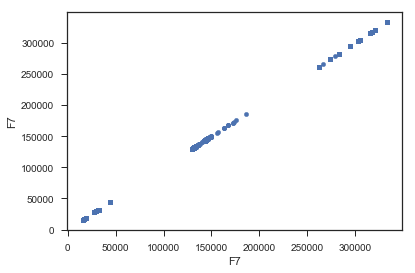

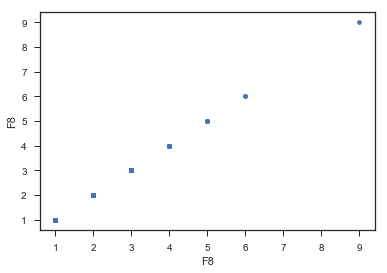

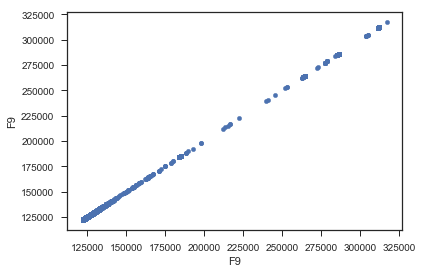

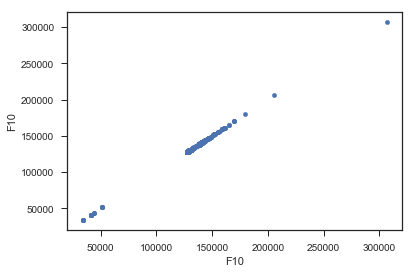

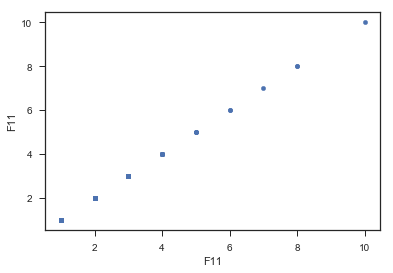

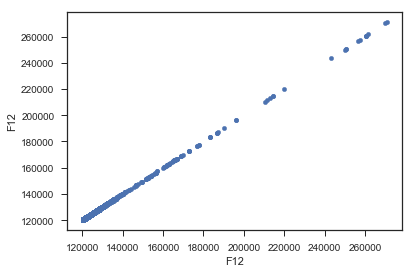

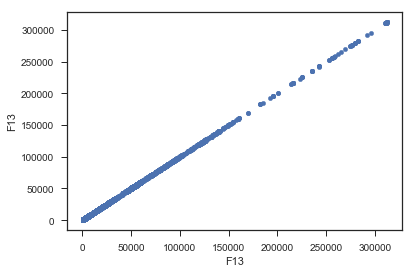

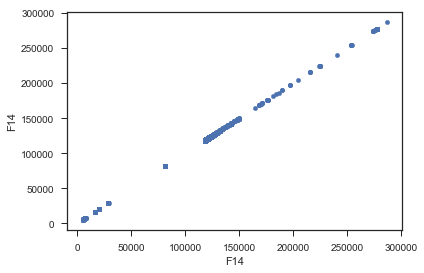

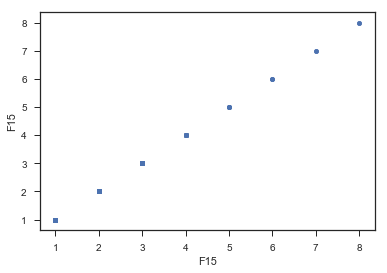

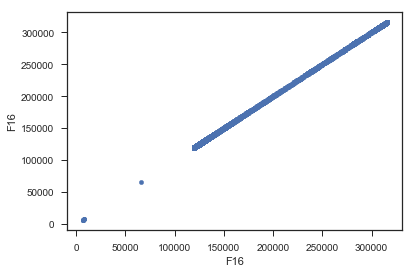

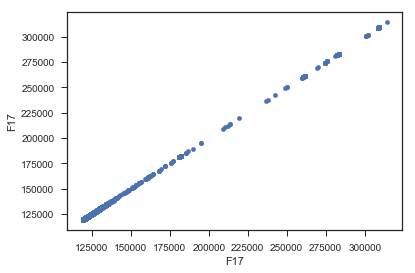

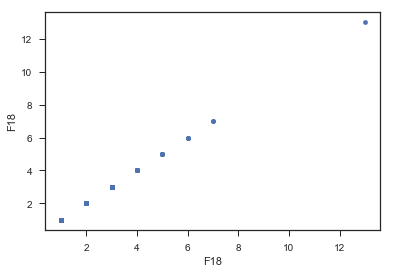

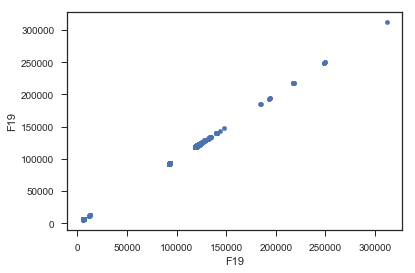

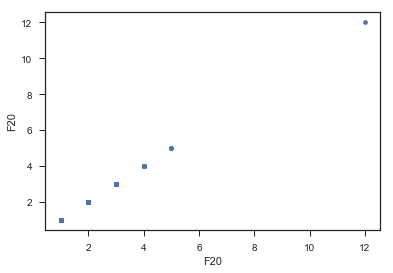

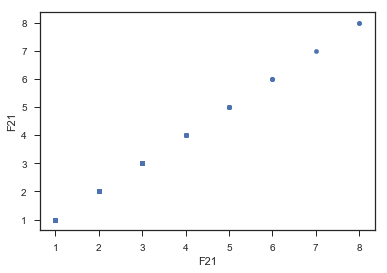

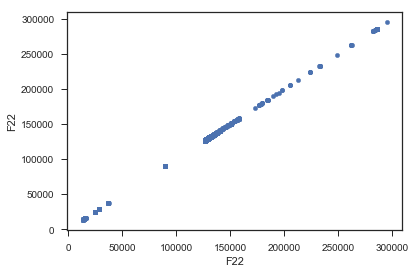

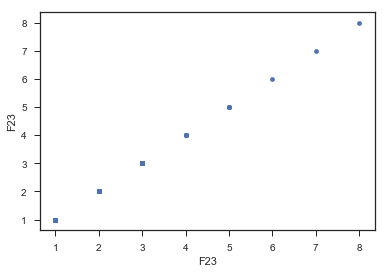

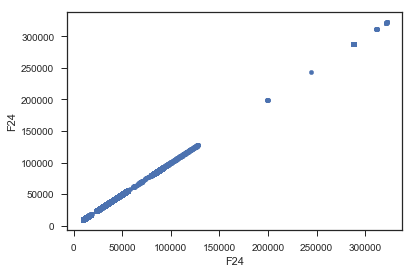

In [17]:
#Now let's display our remaining features in a seaborne pair plot to get an idea of the distributions of each feature
#Hopefully they will be gaussian distributions as some of our algorithms depend on that, if they aren't we will need to
#transform the data into a gaussian distribution, usually by taking the log of it

cols = trainCopy.columns

for i in cols:
    trainCopy.plot.scatter(i,i)